## Data Analysis of major technology stocks

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import stock data from yahoo

#from pandas_datareader.data import DataReader
import yfinance as yf
print(yf.download)
#from pandas_datareader import data as pdr

from datetime import datetime
from dateutil.relativedelta import relativedelta


<function download at 0x000001E107D7A2A0>


In [ ]:
# I am going to set up the company names and tickers that I want to analyze and make an inference on
# Some thoughts I have prior to doing any analysis is that most technology companies are going to follow a similar trend in terms of price movement,
# but competitors such as AMD and Nvidia might have an inverse relationship


company_name = ['Google', 'Apple', 'Nvidia', 'AMD', 'Tesla', 'Microsoft', 'Amazon']

company_ticker = ['GOOG', 'AAPL', 'NVDA', 'AMD', 'TSLA', 'MSFT', 'AMZN']

# we are going to grab all these stocks that we want using the yahoo finance, and get data on them from 2024 to now
# to grab the data, I decided to create a dictionary to store the dataframes of each ticker in

today = datetime.now()
one_year_ago = today - relativedelta(years=1)


stock_data = {}
for ticker, company in zip(company_ticker, company_name):
    df = yf.download(ticker, start=one_year_ago, end=today)
    df['Company_Name'] = company
    df.columns = df.columns.get_level_values(0) #did this to remove the multi-index columns that yfinance does now for some reason
    print(df.columns)
    stock_data[ticker] = df


# test if data properly stored in dictionary
#(stock_data['GOOG'].head())
#stock_data['GOOG'].describe()
#stock_data['GOOG'].info()
#print(stock_data[ticker])
#stock_data['GOOG'].columns
#type(stock_data)


I visualized the closing price three different ways:
1st way(commented out): each stock has its own graph
2nd way: one graph with the closing prices of every stock
3rd way: a 2x4 subplot with each stock in its own respective plot

I found that the best way to visualize closing prices in my case was to use one graph since I am trying to see if all technology stocks follow a similar trend. As seen from the plot, we can visually see that only Tesla deviated from the regular trend.

That is as expected since Tesla is a highly volatile stock. What I did not expect, is that Nvidia and AMD follow a similar trend. When Nvidia prices increase, AMD follows suit. Very interesting.

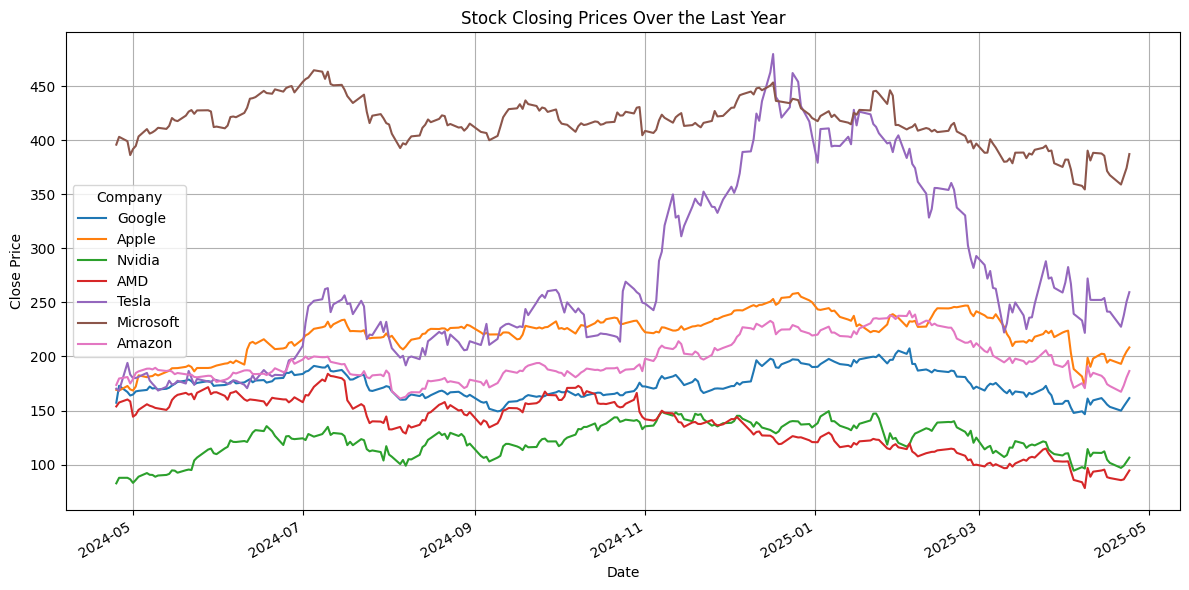

In [32]:


# for i, ticker in enumerate(stock_data):
#     stock_data[ticker]['Close'].plot()
#     plt.ylabel('Close')
#     plt.title(f"{company_name[i]} Closing Prices")
#     plt.show()


plt.figure(figsize=(12, 6))

for i, ticker in enumerate(stock_data):
    stock_data[ticker]['Close'].plot(label=company_name[i])

plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over the Last Year')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()


# fig, axes = plt.subplots(4, 2, figsize=(15, 15))
# axes = axes.flatten()

# for i, ticker in enumerate(stock_data):
#     stock_data[ticker]['Close'].plot(ax=axes[i])
#     axes[i].set_ylabel('Close')
#     axes[i].set_title(f"{company_name[i]} Closing Prices")
#     axes[i].grid(True)

# axes[-1].axis('off')
# plt.tight_layout()


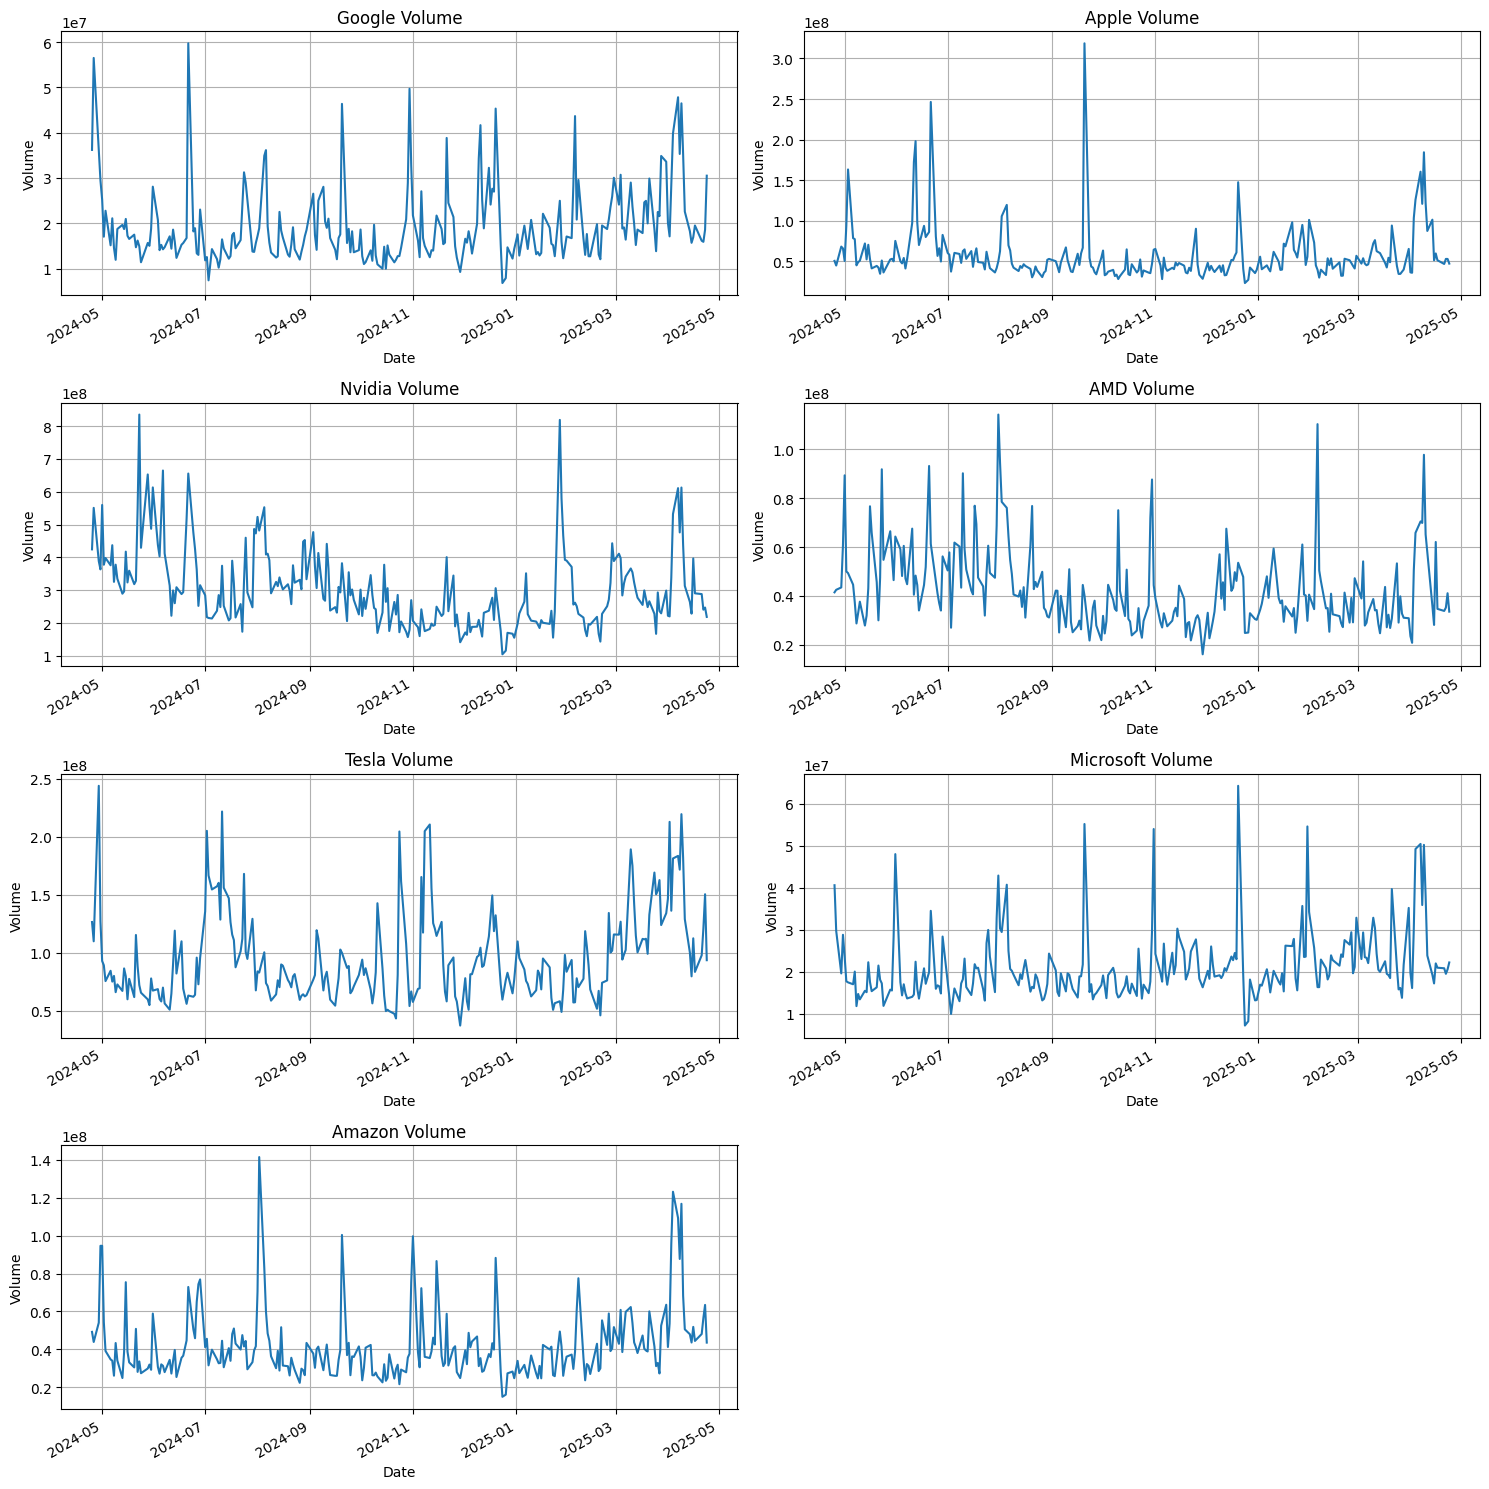

In [33]:

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()


for i, ticker in enumerate(stock_data):
    stock_data[ticker]['Volume'].plot(ax=axes[i])
    axes[i].set_ylabel('Volume')
    axes[i].set_title(f"{company_name[i]} Volume")
    axes[i].grid(True)


axes[-1].axis('off')

plt.tight_layout()


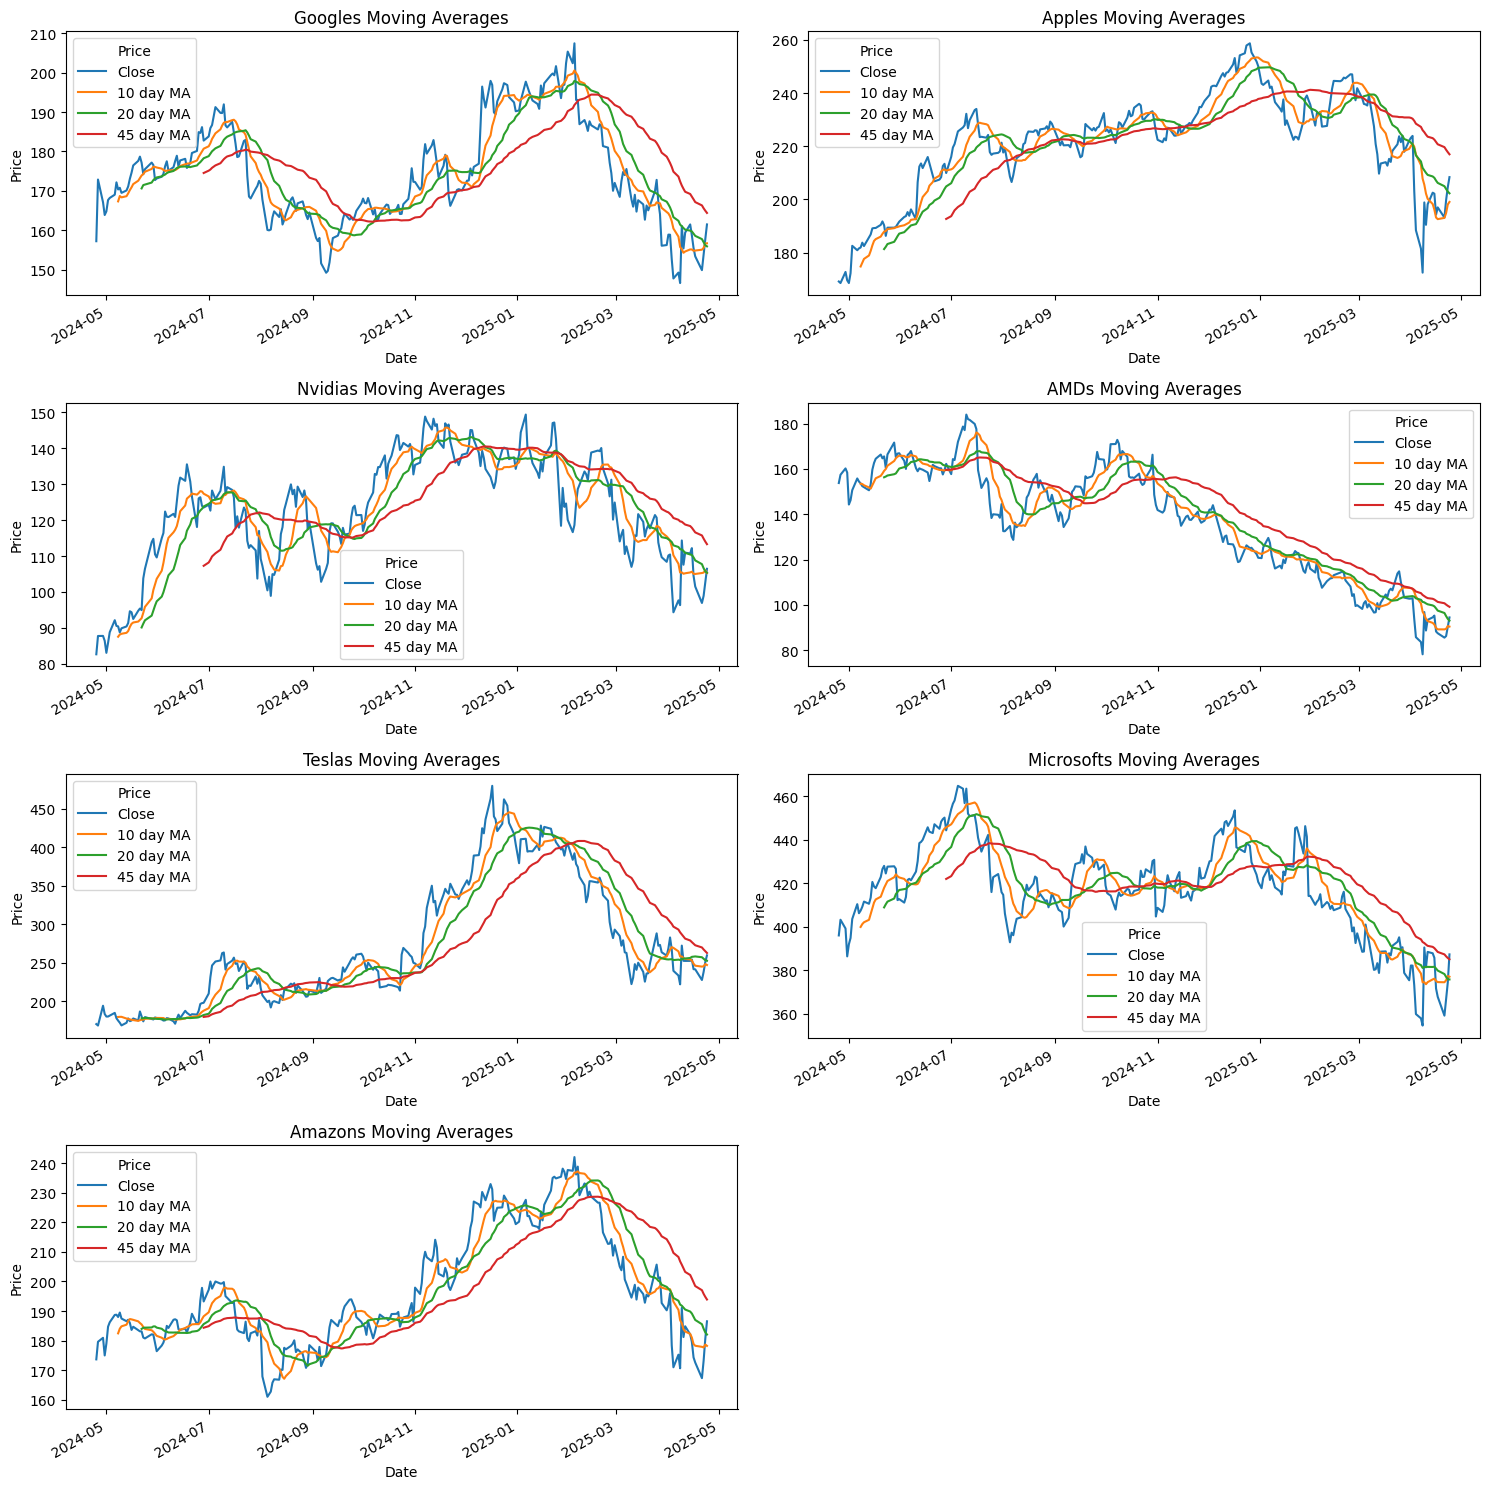

In [34]:
ma_ranges = [10, 20, 45]

for ma in ma_ranges:
    for ticker in stock_data:
        ma_column = f'{ma} day MA'
        stock_data[ticker][ma_column] = stock_data[ticker]['Close'].rolling(ma).mean()

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, ticker in enumerate(stock_data):
    stock_data[ticker][['Close', '10 day MA', '20 day MA', '45 day MA']].plot(ax=axes[i])
    axes[i].set_title(f'{company_name[i]}s Moving Averages')
    axes[i].set_ylabel('Price')

axes[-1].axis('off')


plt.tight_layout()


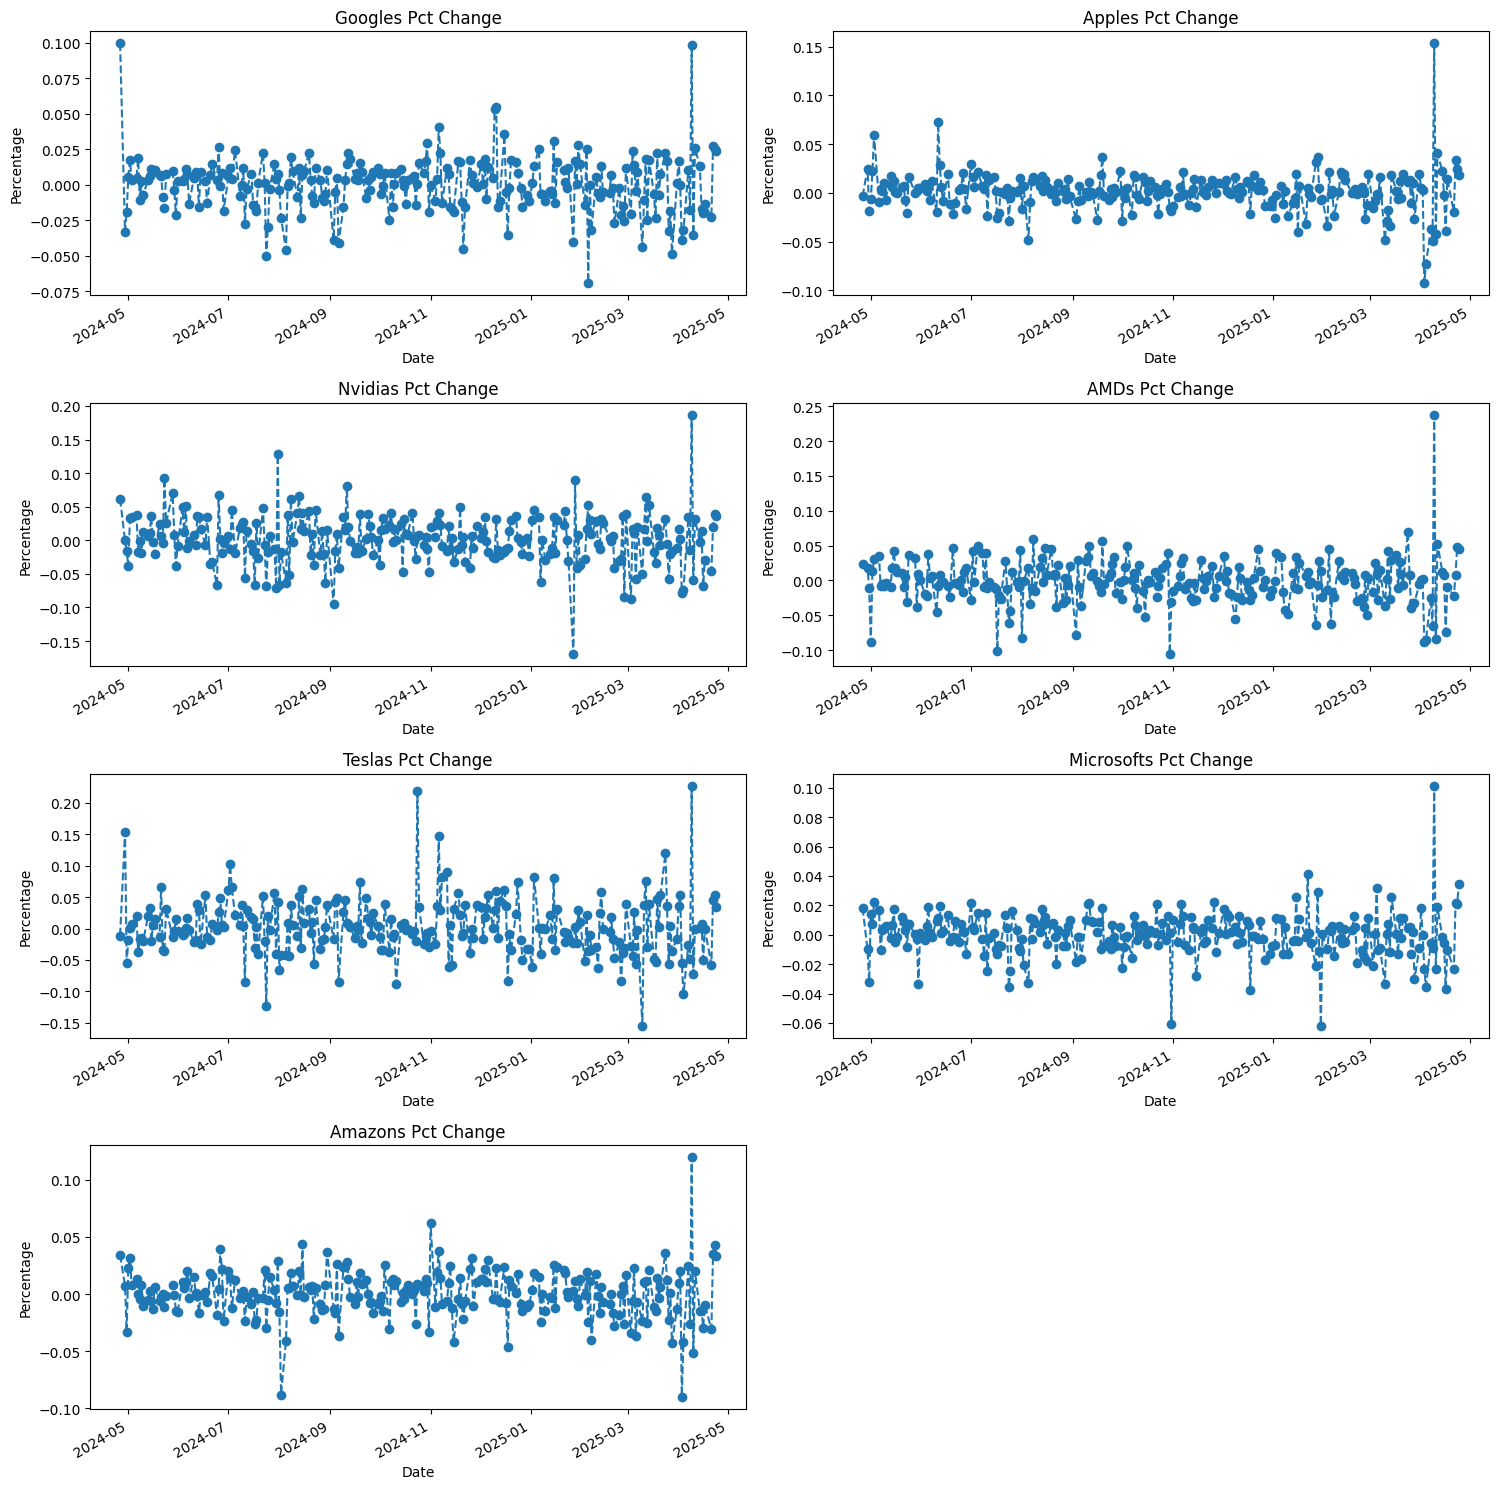

In [ ]:
#Lets look at the pct change of closing prices for each stock

for ticker in stock_data:
    stock_data[ticker]['Daily Pct Change'] = stock_data[ticker]['Close'].pct_change()

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, ticker in enumerate(stock_data):
    stock_data[ticker][['Daily Pct Change']].plot(ax=axes[i], linestyle='--', marker='o')
    axes[i].set_title(f'{company_name[i]}s Pct Change')
    axes[i].set_ylabel('Percentage')
    axes[i].get_legend().set_visible(False)

axes[-1].axis('off')


plt.tight_layout()


Using the daily pct change graphs to draw some insight, the higher the vertical spread is, the higher the volatility of that stock is. Judging from the graph, Tesla is the most price volatile stock out of these seven, which is as I predicted prior. 